In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.cm as cm
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# Load files

In [2]:
# %load grid.py
import bisect

## Grid parameters
# Top left corner of the area
MAP_LAT = 46.5
MAP_LON = 6.55

# Total area size
MAP_SIZE_LAT = 0.07
MAP_SIZE_LON = 0.10

# Number of cells
CELL_NUM_LAT = 10
CELL_NUM_LON = 10

# Grid lines
GRID_LAT_POINTS = [MAP_LAT + i * (MAP_SIZE_LAT / CELL_NUM_LAT)
                   for i in range(1, CELL_NUM_LAT + 1)]
GRID_LON_POINTS = [MAP_LON + i * (MAP_SIZE_LON / CELL_NUM_LON)
                   for i in range(1, CELL_NUM_LON + 1)]


def location_to_cell_id(lat, lon):
    """Get the grid cell ID for a given latitude and longitude."""
    if not (MAP_LAT <= lat < MAP_LAT + MAP_SIZE_LAT) or not (
        MAP_LON <= lon < MAP_LON + MAP_SIZE_LON
    ):
        raise ValueError("Out of area range.")

    i = bisect.bisect(GRID_LAT_POINTS, lat)
    j = bisect.bisect(GRID_LON_POINTS, lon)
    return i * CELL_NUM_LAT + j + 1


In [3]:
f_queries = open("queries.csv", "r")
queries = f_queries.read()

f_pois = open("pois.csv", "r")
pois = f_pois.read()

In [34]:
# some useful function

def is_weekend_day(float_nb):
    return (float_nb>=120 and float_nb<=168) or (float_nb>=288 and float_nb<=336) or (float_nb>=456)

def is_weekday(float_nb):
    return not is_weekend_day(float_nb)

def is_worktime(float_nb):
    #worktime = between 9->12 and 14->17h 
    return is_weekday(float_nb)and(((float_nb%24>=9)and(float_nb%24<12))or((float_nb%24>=14)and(float_nb%24<17)))

def is_hometime(float_nb):
    #hometime = weekend or between 10PM -> 6AM
    return (is_weekday(float_nb)and((float_nb%24<=6) or (float_nb%24>=22)))
    #is_weekend_day(float_nb)or

In [47]:
#some functions given a ip address: 
#here the format of everything_list is assumed to be list[list[ip_add, lat, lon, timestamp, poi]] everythin as string

def get_pois(ip, everything_list):
    return set([x[4] for x in everything_list if(x[0]==ip)])

def get_positions(ip, everything_list):
    l = [(float(x[1]), float(x[2])) for x in everything_list if(x[0]==ip)]
    return ([i for i,j in l], [j for i,j in l])

def get_positions_work(ip, everything_list):
    l = [(float(x[1]), float(x[2])) for x in everything_list if(x[0]==ip and is_worktime(float(x[3])))]
    return ([i for i,j in l], [j for i,j in l])

def get_positions_home(ip, everything_list):
    set_all = set([(float(x[1]), float(x[2])) for x in everything_list if(x[0]==ip)])
    set_work = set([(float(x[1]), float(x[2])) for x in everything_list if(x[0]==ip and is_worktime(float(x[3])))])
    #l = [(float(x[1]), float(x[2])) for x in everything_list if(x[0]==ip and not(is_worktime(float(x[3]))))]
    l =list(set_all-set_work)
    return ([i for i,j in l], [j for i,j in l])
    

def get_work_pois(ip, everything_list):
    return set([x[4] for x in everything_list if(x[0]==ip and is_worktime(float(x[3])))])

def get_hobby_pois(ip, everything_list):
    return set([x[4] for x in everything_list if(x[0]==ip and not(is_worktime(float(x[3]))))])

def get_work_cell(ip, everything_list):
    l = [(float(x[1]), float(x[2])) for x in everything_list if(x[0]==ip and is_worktime(float(x[3])))]
    return set([location_to_cell_id(x, y) for x,y in l])

def get_home_cell(ip, everything_list):
    l = [(float(x[1]), float(x[2])) for x in everything_list if(x[0]==ip and is_hometime(float(x[3])))]
    return set([location_to_cell_id(x, y) for x,y in l])
    
    
    
    

In [6]:
with open("queries.csv", "r") as f_queries:
    queries = f_queries.readlines()
    
    queries = [q.split() for q in queries][1:]
    
    ip_set = set([x[0] for x in queries])

In [7]:
with open("pois.csv", "r") as f_pois:
    pois = f_pois.readlines()
    pois = [p.split() for p in pois][1:]

all_pois = set([x[2] for x in pois])

print(len(all_pois))
print(all_pois)

12
{'laboratory', 'gym', 'bar', 'cafeteria', 'villa', 'dojo', 'appartment_block', 'office', 'company', 'supermarket', 'restaurant', 'club'}


In [46]:
set_all_pos = set([(float(x[1]), float(x[2])) for x in queries if(x[0]=='121.229.130.24')])
print(set_all_pos)

set_work_pos = set([(float(x[1]), float(x[2])) for x in queries if(x[0]=='121.229.130.24' and is_worktime(float(x[3])))])
print(set_work_pos)

print(set_all_pos-set_work_pos)
print(len(set_all_pos))
print(len(set_work_pos))
print(len(set_all_pos-set_work_pos))

print(list(set_all_pos-set_work_pos))

{(46.513245569065845, 6.61495877973916), (46.503637844877005, 6.6276736078942475), (46.507692844471755, 6.6109719577603165), (46.510650386991706, 6.618873471481859), (46.54267878942992, 6.593287653940389), (46.507164978818096, 6.611651383555449), (46.531421408573365, 6.601382746325085), (46.50954670732587, 6.614296876569411), (46.555947707205696, 6.626944478678066)}
{(46.507692844471755, 6.6109719577603165), (46.54267878942992, 6.593287653940389)}
{(46.507164978818096, 6.611651383555449), (46.531421408573365, 6.601382746325085), (46.503637844877005, 6.6276736078942475), (46.510650386991706, 6.618873471481859), (46.513245569065845, 6.61495877973916), (46.50954670732587, 6.614296876569411), (46.555947707205696, 6.626944478678066)}
9
2
7
[(46.507164978818096, 6.611651383555449), (46.531421408573365, 6.601382746325085), (46.503637844877005, 6.6276736078942475), (46.510650386991706, 6.618873471481859), (46.513245569065845, 6.61495877973916), (46.50954670732587, 6.614296876569411), (46.55594

In [14]:
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(200)]

In [16]:
colors2 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(200)]

In [18]:
colors3 = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(200)]

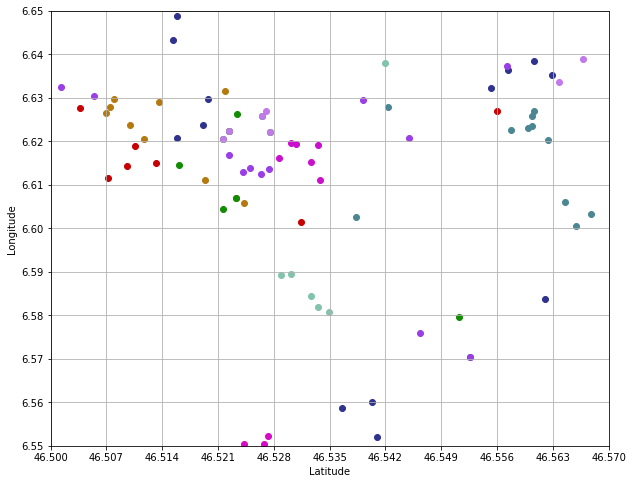

In [49]:
points1 = get_positions("34.101.177.245", queries)    
points2 = get_positions("244.190.169.115", queries)
points3 = get_positions("191.78.122.246", queries)


data = [get_positions_home(ip, queries) for ip in list(ip_set)[190:]]

#colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#             for i in range(200)]
#colors = cm.rainbow(np.linspace(0, 1, 10))

grid_elem_lat = [MAP_LAT]
grid_elem_lat.extend(GRID_LAT_POINTS)
lat_space = grid_elem_lat[1]-grid_elem_lat[0]


grid_elem_lon = [MAP_LON]
grid_elem_lon.extend(GRID_LON_POINTS)
lon_space = grid_elem_lon[3]-grid_elem_lon[2]


fig, ax = plt.subplots(figsize=(10, 8))


for data, color in zip(data, colors2):
    x, y = data
    ax.scatter(x, y, c=color)


    
ax.set_xlim(grid_elem_lat[0], grid_elem_lat[10])
ax.set_ylim(grid_elem_lon[0], grid_elem_lon[10])

ax.set_xticks(grid_elem_lat)
ax.set_yticks(grid_elem_lon)



ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")


plt.grid(True)
plt.savefig('locations_home10.jpg')
plt.show()

In [10]:
data = [[ip, get_pois(ip, queries)] for ip in list(ip_set)[190:]]

Note: you may need to restart the kernel to use updated packages.


In [12]:
from prettytable import PrettyTable
t = PrettyTable(['ip address', 'POIs'])

for row in data:
    t.add_row(row)
    
print(t)

+-----------------+------------------------------------------------------------+
|    ip address   |                            POIs                            |
+-----------------+------------------------------------------------------------+
|  121.229.130.24 |        {'restaurant', 'club', 'dojo', 'cafeteria'}         |
|  78.204.108.127 |     {'restaurant', 'supermarket', 'club', 'cafeteria'}     |
|  204.146.211.61 | {'gym', 'cafeteria', 'restaurant', 'supermarket', 'club'}  |
|  84.37.183.178  | {'bar', 'cafeteria', 'dojo', 'restaurant', 'supermarket'}  |
|  140.81.135.193 |     {'gym', 'bar', 'cafeteria', 'dojo', 'restaurant'}      |
| 130.144.146.191 | {'gym', 'bar', 'cafeteria', 'dojo', 'restaurant', 'club'}  |
|   34.34.64.234  |         {'restaurant', 'club', 'bar', 'cafeteria'}         |
|  152.115.234.99 |        {'restaurant', 'club', 'dojo', 'cafeteria'}         |
|  88.32.125.209  | {'cafeteria', 'dojo', 'restaurant', 'supermarket', 'club'} |
|   210.229.8.27  |  {'gym',

In [13]:
from tabulate import tabulate
print(tabulate(data, headers=['ip address', 'work POIs', 'hobby POIs']))

ip address       work POIs
---------------  ----------------------------------------------------------
121.229.130.24   {'restaurant', 'club', 'dojo', 'cafeteria'}
78.204.108.127   {'supermarket', 'restaurant', 'club', 'cafeteria'}
204.146.211.61   {'gym', 'cafeteria', 'restaurant', 'supermarket', 'club'}
84.37.183.178    {'bar', 'cafeteria', 'dojo', 'restaurant', 'supermarket'}
140.81.135.193   {'gym', 'bar', 'cafeteria', 'dojo', 'restaurant'}
130.144.146.191  {'gym', 'bar', 'cafeteria', 'dojo', 'restaurant', 'club'}
34.34.64.234     {'restaurant', 'club', 'bar', 'cafeteria'}
152.115.234.99   {'restaurant', 'club', 'dojo', 'cafeteria'}
88.32.125.209    {'cafeteria', 'dojo', 'restaurant', 'supermarket', 'club'}
210.229.8.27     {'gym', 'bar', 'cafeteria', 'restaurant', 'supermarket'}
